In [9]:
#importación de las librerias necesarias: 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree as tr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [99]:
data_hour = pd.read_csv("C:/Archivos/hour.csv")
data_day = pd.read_csv("C:/Archivos/day.csv")
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 1.Análisis de Datos
**Análisis de Datos Missing y Outliers**

In [117]:
# Contar el número de valores no NaN en cada columna
data_hour.count()
# Todos los datos son parejos

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64

#### 1.2.Buscamos outliers (atípicos), si existieren

---

**Comparamos mean (media) y median (mediana)**

Si los valores por cada característica difieren 'demasiado', entonces existen valores atípicos en nuestro dataset que necesitan set tratados, para este ejemplo los outliers estan estan en 'casual' y 'registered'

In [118]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [119]:
data_hour.median()

instant       8690.0000
season           3.0000
yr               1.0000
mnth             7.0000
hr              12.0000
holiday          0.0000
weekday          3.0000
workingday       1.0000
weathersit       1.0000
temp             0.5000
atemp            0.4848
hum              0.6300
windspeed        0.1940
casual          17.0000
registered     115.0000
cnt            142.0000
dtype: float64

In [124]:
# Hago una copia del dataset, para realizar el análisis 
data_hour2 = data_hour.copy()


### Realizamos el tratamiento para 'registered'

In [125]:
#Calculamos los cuantiles:
# Cuartil 1  es de 25%
# Cuartil 2  es de 50%
# Cuartil 3  es de 75%
q25=np.percentile(data_hour2[['registered']], 25)
q75=np.percentile(data_hour2[['registered']], 75)
RIC=q75-q25
LI=q25-1.5*RIC
LS=q75+1.5*RIC
#Verificamos los cortes:
# LI: Limite Inferior
# SL: Limite superior
# Los valores que estan fuera de este rango, se lo considera valores atipicos
print(LI,LS)

-245.0 499.0


In [126]:
# Determinando el total de valores atípicos para 'registered'.

MIN=data_hour2[['registered']].min()
MAX=data_hour2[['registered']].max()
#print(MIN,MAX)

# df_LI: Dataset con los datos que cumplen el criterio de LI.
df_LI=data_hour2[data_hour2['registered']>=LI]
# df_LS: Dataset con los datos que cumplen el criterio de LS.
# Al utilizar el dataframe, restara el valor total con los atipicos
df_LS=data_hour2[data_hour2['registered']<=LS]

v_atipico_inferior_registered = data_hour2[['registered']].count() - df_LI[['registered']].count()
v_atipico_superior_registered = data_hour2[['registered']].count() - df_LS[['registered']].count()
print("Valores atípicos encontrados para registered: ")
print("Límite inferior: " + str(v_atipico_inferior_registered))
print("Límite superor: " + str(v_atipico_superior_registered))

Valores atípicos encontrados para registered: 
Límite inferior: registered    0
dtype: int64
Límite superor: registered    680
dtype: int64


In [127]:
# Se crea una nueva columna y los valores que son "atipicos" son reemplazos con
#el cuantil 3
data_hour2['registered2']=data_hour2['registered'].where(data_hour2['registered']<=LS,q75)

### Realizamos el tratamiento para 'casual'

In [128]:
q25=np.percentile(data_hour2[['casual']], 25)
q75=np.percentile(data_hour2[['casual']], 75)
RIC=q75-q25
LI=q25-1.5*RIC
LS=q75+1.5*RIC
print(LI,LS)

-62.0 114.0


In [129]:
# Determinando el total de valores atípicos para 'casual'.

MIN=data_hour2[['casual']].min()
MAX=data_hour2[['casual']].max()
#print(MIN,MAX)

# df_LI: Dataset con los datos que cumplen el criterio de LI.
df_LI=data_hour2[data_hour2['casual']>=LI]
# df_LS: Dataset con los datos que cumplen el criterio de LS.
# Al utilizar el dataframe, restara el valor total con los atipicos
df_LS=data_hour2[data_hour2['casual']<=LS]

v_atipico_inferior_casual = data_hour2[['casual']].count() - df_LI[['casual']].count()
v_atipico_superior_casual = data_hour2[['casual']].count() - df_LS[['casual']].count()
print("Valores atípicos encontrados para casual: ")
print("Límite inferior: " + str(v_atipico_inferior_casual))
print("Límite superor: " + str(v_atipico_superior_casual))

Valores atípicos encontrados para casual: 
Límite inferior: casual    0
dtype: int64
Límite superor: casual    1192
dtype: int64


In [130]:
# Se crea una nueva columna para casual. Para los datos atipicos son reemplazado
# con el cuantil 3
data_hour2['casual2'] = data_hour2['casual'].where(data_hour2['casual']<=LS,q75)

In [131]:
## Volmemos a realizar el análisis, pues ahora los valores de mean y median
## de casual y registered ya no estan tan 'alejados'
data_hour2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,registered2,casual2
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,137.728580,26.631970
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,116.606252,27.206421
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,34.000000,4.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,115.000000,17.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,220.000000,48.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,499.000000,114.000000


In [132]:
data_hour2.median()

instant        8690.0000
season            3.0000
yr                1.0000
mnth              7.0000
hr               12.0000
holiday           0.0000
weekday           3.0000
workingday        1.0000
weathersit        1.0000
temp              0.5000
atemp             0.4848
hum               0.6300
windspeed         0.1940
casual           17.0000
registered      115.0000
cnt             142.0000
registered2     115.0000
casual2          17.0000
dtype: float64

# 2.Preparación de Datos para entrenamiento


**Teniendo en cuenta el enunciado del taller:**

>Repite el ejercicio haciendo el siguiente grupo y desarrollando un algoritmo de clasificación: grupo 1 si cnt<=20, grupo 2 en otro caso

In [137]:
#Teniendo en cuenta el enunciado del taller:

data_hour2['clase'] = np.where(data_hour2['cnt']<20, 1, 2) 


In [ ]:
## Pues el dataset no cuenta con una columna día, para el resto del date si

from datetime import datetime

for indice in range(len(data_hour2)):
  dt = datetime.strptime(data_hour2.dteday[indice], '%Y-%m-%d')
  new_value = dt.day
  data_hour2.loc[indice, 'dteday'] = new_value

In [139]:
data_hour2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,registered2,casual2,clase
0,1,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,13,3,1
1,2,1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,32,8,2
2,3,1,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,27,5,2
3,4,1,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,10,3,1
4,5,1,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,0,1


**Realizamos la separación de los datos:**

1. Eliminamos la columna "instant" ya que no es una columna útil del dataset y únicamente sirve como índice.
2. Quitamos la columna "cnt" ya que en este caso utilizaremos la columna "clase".
3. Separamos los encabezados de los datos.

In [141]:
## Separamos en atributos y etiquetas
## Etiquetas, labels son los valores que vamos a predecir.

Xc = data_hour2[['season','dteday','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual2','registered2']].values
yc = data_hour2['clase']

# Encabezados para posterior uso sin la variable cnt
feature_list = ['season','dteday','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual2','registered2']
print(feature_list) 


['season', 'dteday', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual2', 'registered2']


Dividimos los datos en los conjuntos de **entrenamiento 70%** y **prueba 30%**:

In [143]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xc, yc, test_size=0.3, shuffle=True)
print('Dimensión conjunto entrenamiento: ', X_trainc.shape)
print('Dimensión conjunto prueba: ',X_testc.shape)
print('Numero de instancias de entrenamiento: ',y_trainc.shape)
print('Numero de instancias de prueba: ',y_testc.shape)

Dimensión conjunto entrenamiento:  (12165, 15)
Dimensión conjunto prueba:  (5214, 15)
Numero de instancias de entrenamiento:  (12165,)
Numero de instancias de prueba:  (5214,)


### creacion de un Grid Search que nos permitira ajustar nuestros parametros

Para esto vamos a utilizar la configuracion anteriormente utilizada mas la clase RandomForestClassifier de sklearn

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parametros = {'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200],
    'oob_score':[True]
}

# Create a based model
# n_jobs = Numero de trabajos en paralelo, -1 usa todos los procesadores.
# cv = Determina la estrategia de división de validación cruzada
# verbose = Controla la verbosidad: cuanto más alto, más mensajes
rfc = RandomForestClassifier()  #clase RandomForestClassifier() para el clasificador

# Instantiate the grid search model
grid_searchc = GridSearchCV(estimator = rfc, 
                           param_grid = parametros, 
                           cv = 3, 
                           n_jobs = -1, 
                           verbose = 2)


#### Entrenamiento del modelo

Vamos a entrenar el modelo, teniendo en cuenta el dataset de entrenamiento previamente dividido

In [145]:
grid_searchc.fit(X_trainc, y_trainc)
# Visualizamos los mejores parametros, luego de la validación cruzada.
param = grid_searchc.best_params_


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.9min finished


In [146]:
print(param)

{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200, 'oob_score': True}


#### prediccion con los datos de test

Vamos a realizar una predicción con los datos de test para analizar la veracidad de nuestro modelo.

In [147]:
y_predc = grid_searchc.predict(X_testc)


#### Evaluacion del modelo por medio de diferentes metricas

comprobamos la exactitud de nuestro modelo en este caso 99% lo cual es un valor muy alto

In [148]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Accuracy:",metrics.accuracy_score(y_testc, y_predc))


Accuracy: 0.9975067126965861


Vamos a ver la **matriz de confusion** de nuestro modelo

In [149]:
confusion_matrix(y_testc, y_predc)

pd.DataFrame(
    confusion_matrix(y_testc, y_predc),
    columns=['Prediccion Clase 1', 'Prediccion Clase 2'],
    index=['Clase 1', 'Clase 2']
)

,Prediccion Clase 1,Prediccion Clase 2
Clase 1,835,3
Clase 2,10,4366


**Conclusion:** Viendo la matriz de confusion nos damos cuenta que la mayoria de los resultados caen en la horizontal lo cual es un excelente pronostico para nuestro modelo.

Tenemos 10 falsos negativos y 3 falsos positivos

In [150]:
clasificador = RandomForestClassifier(bootstrap=param['bootstrap'],
                                 max_depth=param['max_depth'],
                                 max_features=param['max_features'],
                                 min_samples_leaf=param['min_samples_leaf'],
                                 min_samples_split=param['min_samples_split'],
                                 n_estimators=param['n_estimators'],
                                 oob_score=param['oob_score'])


modelo = clasificador.fit(X_trainc, y_trainc)
yprediccion = clasificador.predict(X_testc)

print("Accuracy:",metrics.accuracy_score(y_testc, yprediccion))
print('oob score: ', clasificador.oob_score_)

Accuracy: 0.9959723820483314
oob score:  0.9958898479243732


###### La puntuación del conjunto de datos de entrenamiento obtenido mediante la estimación oob (out-of-bag) es: **99,6%**

**Grafico ejemplo de la clasificacion**

Vamos a realizar un sencillo grafico de la clasificación, con las dos variables mas importantes de nuestro modelo. 



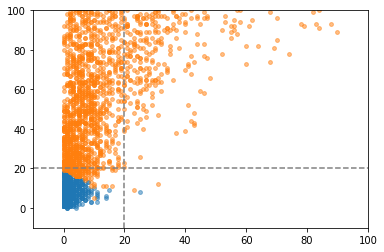

In [151]:
data_hour_C.head(10)
X = X_testc[:, [13,14]].copy()
#y = y_testc.copy()
y = y_predc.copy()

f, ax = plt.subplots(1)

for i in np.unique(y):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1], label=i, alpha=0.5,s=15 )

plt.axvline(20, color = 'gray',linestyle = '--')  # Dibujamos una línea vertical verde centrada en x = 20
plt.axhline(20, color = 'gray', linestyle = '--')  # Dibujamos una línea horizontal verde centrada en  = 20
xmin, xmax, ymin, ymax = -10, 100, -10,100
plt.axis([xmin, xmax, ymin, ymax])

plt.show()